In [1]:
%matplotlib inline
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
import matplotlib.pyplot as plt

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position



In [3]:
FB = pd.read_csv("/Users/fahad/project_repo/data/final/Moving_Average_Preparation/FB_MA_prep.csv", index_col=0)

In [4]:
FB.Date = pd.to_datetime(FB.Date, format="%Y-%m-%d")

In [5]:
FB = FB.set_index(FB['Date'])

In [6]:
# FB = FB.drop("Date", axis=1)


In [7]:
FB.head()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2019-08-15,180.95,182.8200,180.0303,182.23,5957270,2019-08-15
2019-08-14,185.80,185.9900,179.3100,179.71,18883100,2019-08-14
2019-08-13,185.52,191.3800,185.3700,188.45,13577000,2019-08-13
2019-08-12,186.85,187.5900,184.4600,185.37,10936300,2019-08-12
2019-08-09,190.00,190.9653,187.1200,187.85,11058800,2019-08-09


In [8]:
plt.style.use('ggplot')

In [9]:
FB.index

DatetimeIndex(['2019-08-15', '2019-08-14', '2019-08-13', '2019-08-12',
               '2019-08-09', '2019-08-08', '2019-08-07', '2019-08-06',
               '2019-08-05', '2019-08-02',
               ...
               '2012-06-01', '2012-05-31', '2012-05-30', '2012-05-29',
               '2012-05-25', '2012-05-24', '2012-05-23', '2012-05-22',
               '2012-05-21', '2012-05-18'],
              dtype='datetime64[ns]', name='Date', length=1822, freq=None)

/Users/fahad/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


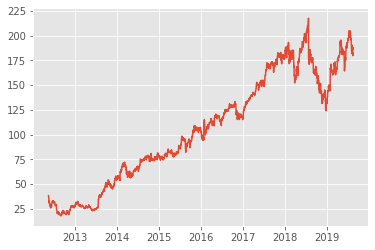

In [10]:
plt.plot(FB.index,FB.Close)


In [11]:
FB = FB[::-1]

In [12]:
#dictionary to store equity
equity_dict = dict()

In [13]:
class SmaCrossTrailing(TrailingStrategy):
            
    n1 = 50
    n2 = 200
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.set_trailing_sl(4)
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if crossover(self.sma1, self.sma2) and (position.is_long!=True):
            
            #print (position.is_long)
                        
            
            self.buy()
        
        
        elif crossover(self.sma2, self.sma1):
            self.sell()
                        
        

            
#     def next(self):
#         #super().next()
#                 # If sma1 crosses above sma2, buy the asset
#         if crossover(self.sma1, self.sma2):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.buy()

#         # Else, if sma1 crosses below sma2, sell it
#         elif crossover(self.sma2, self.sma1):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.sell()
            

        
        

In [14]:
bt = Backtest(FB, SmaCrossTrailing, cash=10000, commission=.01)

bt.run()

Start                     2012-05-18 00:00:00
End                       2019-08-15 00:00:00
Duration                   2645 days 00:00:00
Exposure [%]                          79.6597
Equity Final [$]                      9301.49
Equity Peak [$]                       15926.8
Return [%]                            -6.9851
Buy & Hold Return [%]                 376.643
Max. Drawdown [%]                    -64.5772
Avg. Drawdown [%]                    -5.91273
Max. Drawdown Duration      852 days 00:00:00
Avg. Drawdown Duration       57 days 00:00:00
# Trades                                    7
Win Rate [%]                          28.5714
Best Trade [%]                        218.026
Worst Trade [%]                      -63.4442
Avg. Trade [%]                        18.8693
Max. Trade Duration        1252 days 00:00:00
Avg. Trade Duration         301 days 00:00:00
Expectancy [%]                        50.3414
SQN                                -0.0779707
Sharpe Ratio                      

In [15]:
bt.plot()

In [16]:
df = pd.DataFrame.from_dict([equity_dict])

In [17]:
df = df.T

In [18]:
df.columns = ['Equity']

In [19]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/Moving_Average/FB_Moving_Average_Equity.csv")

In [20]:
class SmaCross(Strategy):
    
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
#         print (self.sma1)
#         print (self.sma2)
    
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.sell()